<a href="https://colab.research.google.com/github/kamalatha/Bootcamp/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, LSTM, GRU # Import RNN layers
from google.colab import files
import io
import os

# 1. Upload your dataset directly into the Colab session
print("Please upload your dataset in CSV format.")

# Remove the file if it already exists
file_name = 'vibration.csv'
if os.path.exists(file_name):
  os.remove(file_name)

uploaded = files.upload()

# Check if a file was uploaded
if not uploaded:
    raise ValueError("No file was uploaded. Please run the cell again and select your CSV file.")

# Get the filename of the uploaded file
file_name = next(iter(uploaded))

# 2. Load your dataset
# io.BytesIO is used to read the uploaded file bytes as a file
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"\nSuccessfully loaded '{file_name}'. Displaying the first 5 rows:")
print(data.head())


# 3. Preprocessing
# One-hot encode categorical features like 'Surface_Type' and 'Material'
data = pd.get_dummies(data, columns=['Surface_Type', 'Material'], drop_first=True)

# Define features (X) and the two target variables (y)
features = [col for col in data.columns if col not in ['Natural_Freq_Hz', 'Damping_Ratio']]
X = data[features]
y = data[['Natural_Freq_Hz', 'Damping_Ratio']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 4. Reshape data for the RNN
# The RNN model expects a 3D input tensor with the shape: (samples, timesteps, features)
# We will treat each row of data as a sequence of length 1 with multiple features.
X_train_reshaped = X_train_scaled[:, np.newaxis, :]
X_test_reshaped = X_test_scaled[:, np.newaxis, :]


# 5. Build the RNN Model
# You can choose between SimpleRNN, LSTM, or GRU layers. LSTM and GRU are generally more powerful.
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
inputs = Input(shape=input_shape)

# Recurrent layers to process the sequence
# Using LSTM as an example
rnn_layer = LSTM(64, activation='relu')(inputs)

# Fully connected layers for regression
dense1 = Dense(100, activation='relu')(rnn_layer)
# The final output layer has 2 neurons for our two target variables
output = Dense(2, name='output')(dense1)

model = Model(inputs=inputs, outputs=output)


# 6. Compile the Model
# For regression, 'mean_squared_error' is a common loss function.
# We also monitor 'mean_absolute_error' (mae) for a more intuitive metric.
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print a summary of the model architecture
model.summary()


# 7. Train the Model
# The number of epochs can be adjusted based on the model's learning progress.
print("\nStarting model training...")
history = model.fit(
    X_train_reshaped, y_train,
    epochs=250,
    batch_size=150,
    validation_split=0.2, # Use part of the training data for validation during training
    verbose=1
)
print("Model training finished.")


# 8. Evaluate the Model on the unseen Test Set
loss, mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'\nTest Set Mean Squared Error: {loss:.4f}')
print(f'Test Set Mean Absolute Error: {mae:.4f}')


# 9. Making Predictions
# The trained model can now be used to predict on new data.
# Note: Any new data must be preprocessed (scaled and reshaped) in the exact same way.
predictions = model.predict(X_test_reshaped)

# Display a few predictions against their actual values
print("\n--- Sample Predictions vs. Actual Values ---")
print("    Predicted Freq. | Predicted Damping | Actual Freq. | Actual Damping")
for i in range(5):
    print(f"    {predictions[i][0]:15.4f} | {predictions[i][1]:17.4f} | {y_test.iloc[i]['Natural_Freq_Hz']:12.4f} | {y_test.iloc[i]['Damping_Ratio']:14.4f}")

Please upload your dataset in CSV format.


Saving vibration.csv to vibration.csv

Successfully loaded 'vibration.csv'. Displaying the first 5 rows:
  Surface_Type  Material  Length_m  Width_m  Thickness_m  Airspeed_mps  \
0      Aileron  Titanium      1.25     0.41        0.014         168.2   
1     Elevator  Aluminum      1.94     0.36        0.021         161.5   
2       Rudder  Aluminum      1.68     0.29        0.027          84.4   
3      Aileron  Titanium      1.52     0.44        0.025         138.0   
4     Elevator  Titanium      0.99     0.41        0.026         144.6   

   Angle_of_Attack_deg  Mode_Number  Natural_Freq_Hz  Damping_Ratio  
0                  0.2            3            11.65          0.034  
1                 -0.1            3            12.95          0.038  
2                 13.1            3            18.28          0.038  
3                  0.0            3            12.69          0.034  
4                  0.4            3            14.94          0.031  


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1, 10)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         6,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,902 (101.18 KB)

 Trainable params: 25,902 (101.18 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - loss: 87.1222 - mae: 6.4626 - val_loss: 86.2892 - val_mae: 6.4317
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 85.3701 - mae: 6.4003 - val_loss: 85.5293 - val_mae: 6.4016
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 86.9128 - mae: 6.4537 - val_loss: 84.7663 - val_mae: 6.3709
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 84.4486 - mae: 6.3626 - val_loss: 83.9809 - val_mae: 6.3389
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 83.9442 - mae: 6.3368 - val_loss: 83.1419 - val_mae: 6.3055
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 82.8864 - mae: 6.2948 - val_loss: 82.2207 - val_mae: 6.2696
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 83.7173 - mae: 6.3263 - val_loss: 81.2013 - val_mae: 6.2297
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 81.6932 - mae: 6.2484 - val_loss: 80.0689 - val_mae: 6.1850
Epoch 9/250
3/3 ━━━━━━━━━━━


Test Set Mean Squared Error: 0.1260
Test Set Mean Absolute Error: 0.2083

--- Visualizing Model Performance ---


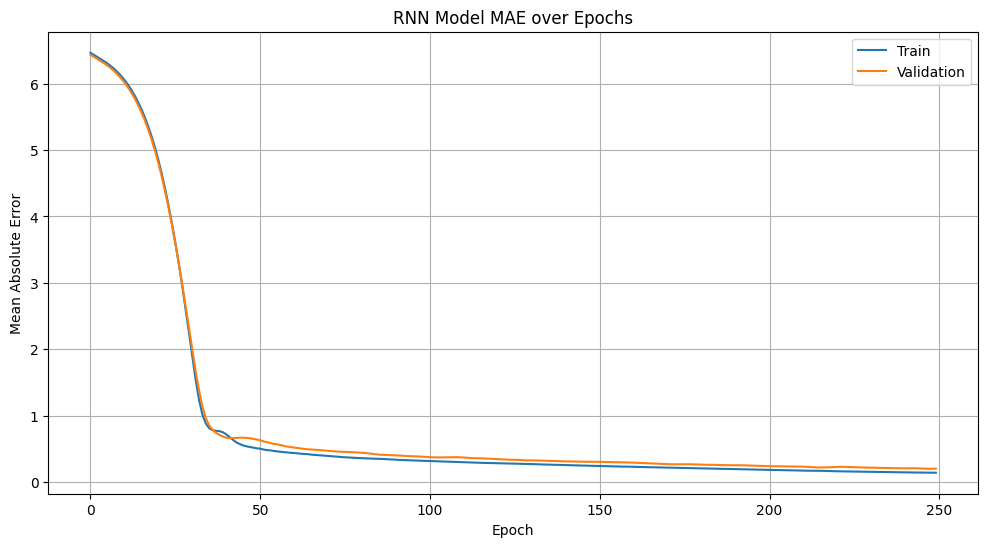

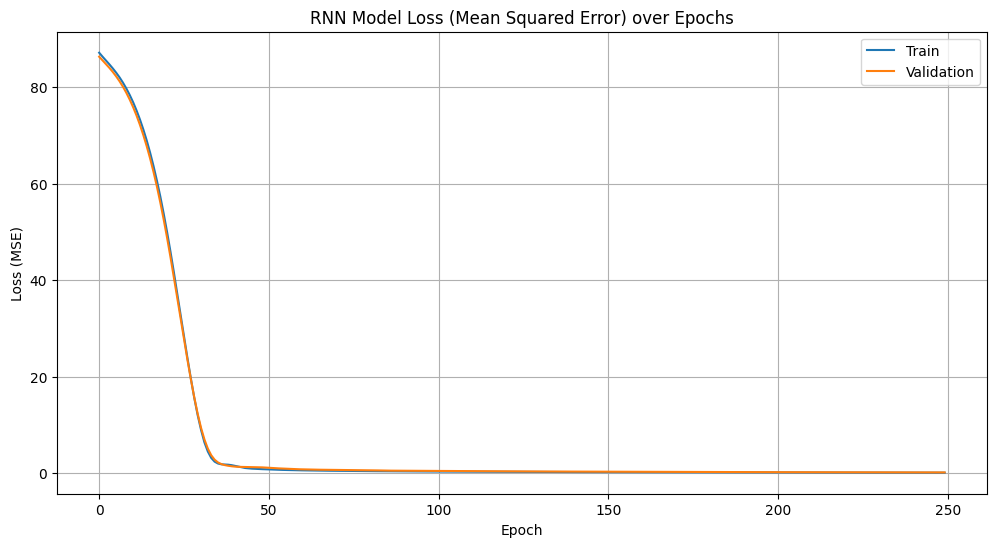


Final Test Set Mean Absolute Error: 0.2083


In [ ]:
import matplotlib.pyplot as plt

# The 'history' and 'mae' variables are already available from training and evaluating the RNN model.

# 8. Evaluate the Model on the unseen Test Set (from previous step)
loss, mae = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'\nTest Set Mean Squared Error: {loss:.4f}')
print(f'Test Set Mean Absolute Error: {mae:.4f}')


# 9. Making Predictions (from previous step)
# ...


# 10. Visualize the RNN Model's Training History
print("\n--- Visualizing Model Performance ---")

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('RNN Model MAE over Epochs') # Changed title to reflect RNN
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Model Loss (Mean Squared Error) over Epochs') # Changed title to reflect RNN
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


# Print the final test set accuracy (MAE) again for clarity
print(f'\nFinal Test Set Mean Absolute Error: {mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

--- Sample Predictions vs. Actual Values ---

--- Visualizing Actual vs. Predicted Values ---


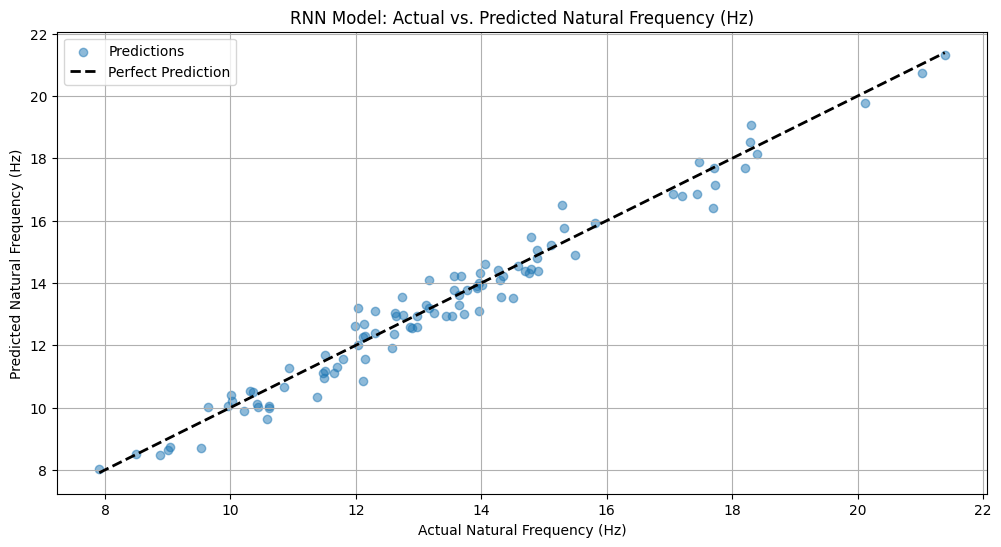

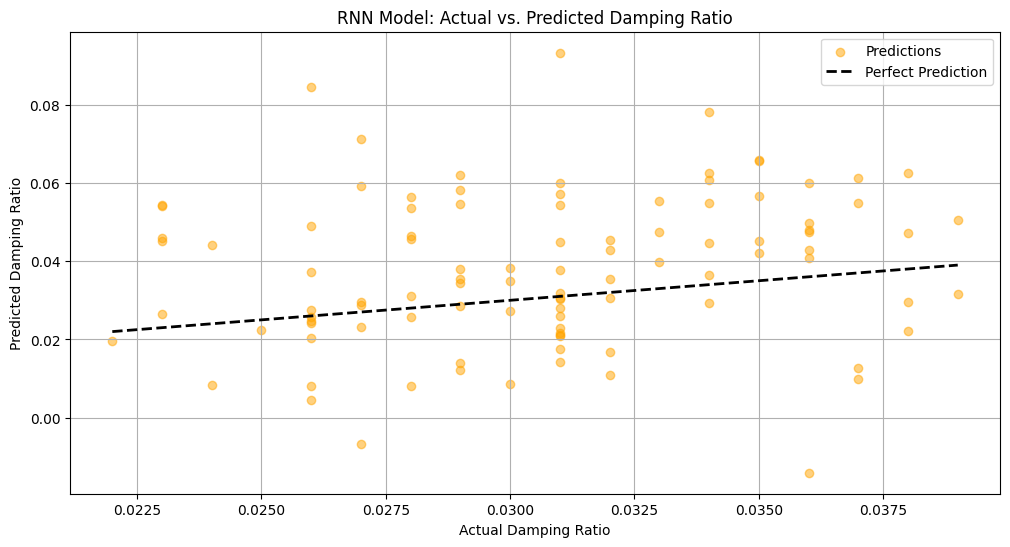

In [ ]:
# The 'y_test' and 'predictions' variables are already available from the test/train split
# and the model.predict() call.

# 9. Making Predictions (from previous step)
predictions = model.predict(X_test_reshaped)

# Display a few predictions against their actual values (from previous step)
print("\n--- Sample Predictions vs. Actual Values ---")
# ... (print statements for sample predictions)


# 11. Visualize Actual vs. Predicted Values for Each Target
print("\n--- Visualizing Actual vs. Predicted Values ---")

# Plotting predicted vs actual values for Natural_Freq_Hz
plt.figure(figsize=(12, 6))
plt.scatter(y_test['Natural_Freq_Hz'], predictions[:, 0], alpha=0.5, label='Predictions')
plt.title('RNN Model: Actual vs. Predicted Natural Frequency (Hz)') # Updated title
plt.xlabel('Actual Natural Frequency (Hz)')
plt.ylabel('Predicted Natural Frequency (Hz)')
plt.grid(True)
# Add a diagonal line for reference. Perfect predictions would lie on this line.
plt.plot([y_test['Natural_Freq_Hz'].min(), y_test['Natural_Freq_Hz'].max()],
         [y_test['Natural_Freq_Hz'].min(), y_test['Natural_Freq_Hz'].max()], 'k--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()

# Plotting predicted vs actual values for Damping_Ratio
plt.figure(figsize=(12, 6))
plt.scatter(y_test['Damping_Ratio'], predictions[:, 1], alpha=0.5, color='orange', label='Predictions')
plt.title('RNN Model: Actual vs. Predicted Damping Ratio') # Updated title
plt.xlabel('Actual Damping Ratio')
plt.ylabel('Predicted Damping Ratio')
plt.grid(True)
# Add a diagonal line for reference.
plt.plot([y_test['Damping_Ratio'].min(), y_test['Damping_Ratio'].max()],
         [y_test['Damping_Ratio'].min(), y_test['Damping_Ratio'].max()], 'k--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()